In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./class.drawio
./ohlcv.npy
./ml-100k.zip
./test2.ipynb
./Happynewyear.ipynb
./test-stumpy.ipynb
./advantage.npy
./test.ipynb
./results/optimizer.pth
./results/model.pth
./files/MNIST/raw/t10k-images-idx3-ubyte
./files/MNIST/raw/t10k-labels-idx1-ubyte
./files/MNIST/raw/train-images-idx3-ubyte
./files/MNIST/raw/t10k-images-idx3-ubyte.gz
./files/MNIST/raw/train-images-idx3-ubyte.gz
./files/MNIST/raw/train-labels-idx1-ubyte.gz
./files/MNIST/raw/train-labels-idx1-ubyte
./files/MNIST/raw/t10k-labels-idx1-ubyte.gz


In [3]:
import torch

In [4]:
torch.__version__

'1.13.0'

In [13]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [5]:
import stumpy
import numpy as np

In [6]:
# from numba import cuda

In [20]:
# all_gpu_devices = [device.id for device in cuda.list_devices()]

In [7]:
# all_gpu_devices

[0]

In [8]:
# matrix_profile = stumpy.gpu_stump(time_series, m = window_size, device_id = all_gpu_devices)

In [9]:
# matrix_profile.shape

In [10]:
# matrix_profile[:10]

# Load Data convert to numpy

In [6]:
path = './ohlcv.npy'

In [7]:
data = dict(np.load(path, allow_pickle=True).item().items())

In [21]:
# data

In [8]:
ohlcv = data.get(3600)

In [9]:
ov = ohlcv[:,[1,5]]

In [10]:
ov

array([[1.33436e+00, 8.74000e+02],
       [1.33430e+00, 1.09300e+03],
       [1.33560e+00, 2.14800e+03],
       ...,
       [1.10853e+00, 7.93000e+02],
       [1.10866e+00, 1.03700e+03],
       [1.10847e+00, 1.07400e+03]])

In [11]:
close = ohlcv[:,4]

In [12]:
close

array([1.33432, 1.33557, 1.33211, ..., 1.10869, 1.10848, 1.10779])

In [13]:
# we want to file m in list of =[3,4,6,8,12]
window_sizes = [3,4,5,6,7,8,9,10,11,12]

In [14]:
mp = {}

In [15]:
for m in window_sizes:
    print(f"m = {m}")
    mp[m] = stumpy.stump(close, m=m)

m = 3


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


m = 4
m = 5
m = 6
m = 7
m = 8
m = 9
m = 10
m = 11
m = 12


In [23]:
# mp = stumpy.stump(o, m=12)

In [149]:
# np.mean(mp[3][:,0])

1.2117304253529058e-05

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [18]:
close

array([1.33432, 1.33557, 1.33211, ..., 1.10869, 1.10848, 1.10779])

In [29]:
# import matplotlib.pyplot as plt
# import numpy as np


# # Plot the time series
# plt.figure(figsize=(10, 6))
# plt.plot(o, linestyle='-', color='b')

# # Set labels and title
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Time Series Plot')

# # Display the plot
# plt.show()

In [19]:
list_motifs = {}
for m in window_sizes:
    print(f"Find Motif for windows size: {m}")
    list_motifs[m] = stumpy.motifs(
        close,
        mp[m][:, 0],
        max_distance=np.mean(np.mean(mp[m][:,0])/2),max_matches = 10, max_motifs = 30)


Find Motif for windows size: 3


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/stumpy/motifs.py:340: UserWarning: The `cutoff` has been set to 0.0 and may result in little/no candidate motifs being identified.
You may consider relaxing the constraint by increasing the `cutoff` (e.g., cutoff=0.0).
  warnings.warn(msg)


Find Motif for windows size: 4
Find Motif for windows size: 5
Find Motif for windows size: 6
Find Motif for windows size: 7


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/stumpy/motifs.py:340: UserWarning: The `cutoff` has been set to 0.0 and may result in little/no candidate motifs being identified.
You may consider relaxing the constraint by increasing the `cutoff` (e.g., cutoff=0.0).
  warnings.warn(msg)


Find Motif for windows size: 8
Find Motif for windows size: 9
Find Motif for windows size: 10
Find Motif for windows size: 11
Find Motif for windows size: 12


In [20]:
print(len(list_motifs[3][1][3]))

10


In [21]:
list_motifs[3][1]

array([[    3,  6337, 11908, 17418, 20614, 21808, 33421, 40766, 42524,
        42851],
       [    9, 18547, 39435, 41661, 48713, 53075, 55218, 78094,    -1,
           -1],
       [   15,   893,  5686,  9177, 14898, 17082, 17159, 22232, 30523,
        34940],
       [   17, 17068, 17573, 27317, 35365, 48073, 48220, 51680, 52006,
        65587],
       [   19, 37444, 38543, 39132, 45514, 72314, 75047,    -1,    -1,
           -1],
       [   21,  2578, 13702, 17192, 17629, 32792, 42594, 47203, 49123,
        60139],
       [   23, 61267,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   32,  8925,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   37,  1723,  7644, 15863, 16015, 17981, 19159, 19537, 20851,
        21082],
       [   44, 69113,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   51, 21559, 57294,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   54, 30419,    -1,    -1,    -1, 

In [22]:
list_motifs[3][1][29]

array([  145, 46863,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
          -1])

In [33]:
# import matplotlib.pyplot as plt
# import numpy as np


# # Plot the time series
# plt.figure(figsize=(10, 6))
# plt.plot(o, linestyle='-', color='b')

# for idx in list_motifs[1][0]:
#     plt.plot(list(range(idx, idx+12, 1)),o[idx:idx+12], c='red', linewidth=4)
#     plt.axvline(x=idx, linestyle="dashed", c='black')
# # Set labels and title
# plt.xlabel('Time')
# plt.ylabel('Open Price')
# plt.title('Time Series Plot')

# # Display the plot
# plt.show()

In [34]:
# for i,idx in enumerate(list_motifs[1][0]):
#     print(idx)

KeyError: 1

In [43]:
# fig, axs = plt.subplots(10, sharex=True, gridspec_kw={'hspace': 0})

# for i,idx in enumerate(list_motifs[1][0]) :
#     axs[i].set_ylabel(f"T_{i}", fontsize='20')
#     axs[i].plot(o[idx:idx+16])
#     axs[i].set_xlabel('Time', fontsize ='20')
#     axs[i].axvline(x=3, linestyle="dashed", c='black')
# plt.show()

In [23]:
advantage_path = "./advantage.npy"

In [24]:
advantage = dict(np.load(advantage_path, allow_pickle=True).item().items())[3600]

In [25]:
advantage[0][1]

-0.037568579141729674

In [26]:
list_motifs[3][1][2]

array([   15,   893,  5686,  9177, 14898, 17082, 17159, 22232, 30523,
       34940])

In [27]:
list_motifs[3][1]

array([[    3,  6337, 11908, 17418, 20614, 21808, 33421, 40766, 42524,
        42851],
       [    9, 18547, 39435, 41661, 48713, 53075, 55218, 78094,    -1,
           -1],
       [   15,   893,  5686,  9177, 14898, 17082, 17159, 22232, 30523,
        34940],
       [   17, 17068, 17573, 27317, 35365, 48073, 48220, 51680, 52006,
        65587],
       [   19, 37444, 38543, 39132, 45514, 72314, 75047,    -1,    -1,
           -1],
       [   21,  2578, 13702, 17192, 17629, 32792, 42594, 47203, 49123,
        60139],
       [   23, 61267,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   32,  8925,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   37,  1723,  7644, 15863, 16015, 17981, 19159, 19537, 20851,
        21082],
       [   44, 69113,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   51, 21559, 57294,    -1,    -1,    -1,    -1,    -1,    -1,
           -1],
       [   54, 30419,    -1,    -1,    -1, 

In [28]:
pattern = []
for m in window_sizes:
    max_l = len(list_motifs[m][1])
    for j in range(max_l):
        increase = 0
        index = 0
        for i,idx in enumerate(list_motifs[m][1][j]):
            if idx != -1:
                index +=1
                if advantage[idx][1] <0:
                    increase +=1
                elif advantage[idx][1] >0:
                    increase -=1
            else:
                break
        
        if abs(increase) > 0.15*index:
            pattern.append((m, list_motifs[m][1][j][0]))
    

In [29]:
pattern

[(3, 3),
 (3, 15),
 (3, 17),
 (3, 19),
 (3, 21),
 (3, 23),
 (3, 32),
 (3, 37),
 (3, 44),
 (3, 51),
 (3, 54),
 (3, 69),
 (3, 73),
 (3, 78),
 (3, 83),
 (3, 92),
 (3, 101),
 (3, 104),
 (3, 107),
 (3, 114),
 (3, 117),
 (3, 125),
 (3, 131),
 (3, 137),
 (4, 189),
 (4, 212),
 (4, 300),
 (4, 620),
 (4, 912),
 (4, 1219),
 (4, 2019),
 (4, 2185),
 (4, 2667),
 (4, 3524),
 (4, 4227),
 (4, 5304),
 (4, 6120),
 (4, 6220),
 (4, 8226),
 (4, 8299),
 (4, 8420),
 (4, 8811),
 (4, 9241),
 (4, 9364),
 (4, 9374),
 (4, 9684),
 (5, 35767),
 (5, 39996),
 (6, 31127),
 (6, 50100),
 (6, 1942),
 (6, 34879),
 (6, 22175),
 (6, 60268),
 (6, 1608),
 (7, 11654),
 (7, 66632),
 (7, 9470),
 (7, 55698),
 (7, 9517),
 (7, 1015),
 (7, 13032),
 (7, 26564),
 (7, 3886),
 (7, 36851),
 (7, 18041),
 (7, 26088),
 (7, 55963),
 (8, 17964),
 (8, 2804),
 (8, 6045),
 (8, 2058),
 (8, 29674),
 (8, 7942),
 (8, 60650),
 (8, 77440),
 (8, 26276),
 (8, 72682),
 (8, 45122),
 (8, 35258),
 (8, 13322),
 (8, 2600),
 (8, 3174),
 (8, 10936),
 (8, 21218),

In [30]:
close.shape

(78387,)

In [31]:
sample_length = 48

In [40]:
split_data = [close[i:i+sample_length] for i in range(len(close) - sample_length + 1)]

In [41]:
len(split_data)

78340

In [42]:
labels = advantage[sample_length-1:,1]

In [43]:
label_binary= [1 if v > 0 else 0 for v in labels]

In [44]:
label_binary = np.array(label_binary)

In [45]:
len(label_binary)

78340

In [46]:
data_embed = np.zeros((len(label_binary),sample_length, len(pattern)))

In [48]:
data_embed.shape

(78340, 48, 147)

In [50]:
pattern

[(3, 3),
 (3, 15),
 (3, 17),
 (3, 19),
 (3, 21),
 (3, 23),
 (3, 32),
 (3, 37),
 (3, 44),
 (3, 51),
 (3, 54),
 (3, 69),
 (3, 73),
 (3, 78),
 (3, 83),
 (3, 92),
 (3, 101),
 (3, 104),
 (3, 107),
 (3, 114),
 (3, 117),
 (3, 125),
 (3, 131),
 (3, 137),
 (4, 189),
 (4, 212),
 (4, 300),
 (4, 620),
 (4, 912),
 (4, 1219),
 (4, 2019),
 (4, 2185),
 (4, 2667),
 (4, 3524),
 (4, 4227),
 (4, 5304),
 (4, 6120),
 (4, 6220),
 (4, 8226),
 (4, 8299),
 (4, 8420),
 (4, 8811),
 (4, 9241),
 (4, 9364),
 (4, 9374),
 (4, 9684),
 (5, 35767),
 (5, 39996),
 (6, 31127),
 (6, 50100),
 (6, 1942),
 (6, 34879),
 (6, 22175),
 (6, 60268),
 (6, 1608),
 (7, 11654),
 (7, 66632),
 (7, 9470),
 (7, 55698),
 (7, 9517),
 (7, 1015),
 (7, 13032),
 (7, 26564),
 (7, 3886),
 (7, 36851),
 (7, 18041),
 (7, 26088),
 (7, 55963),
 (8, 17964),
 (8, 2804),
 (8, 6045),
 (8, 2058),
 (8, 29674),
 (8, 7942),
 (8, 60650),
 (8, 77440),
 (8, 26276),
 (8, 72682),
 (8, 45122),
 (8, 35258),
 (8, 13322),
 (8, 2600),
 (8, 3174),
 (8, 10936),
 (8, 21218),

In [51]:
index = 3
m=3
for i, j  in enumerate(range(index + m -48 , index)):
    if j >= 0:
        print(48 -m - i)
        print(j)

3
0
2
1
1
2


In [95]:
6337/48

132.02083333333334

In [96]:
132*48

6336

In [69]:
thresholds = [np.mean(mp[pt[0]][:, 0])/2 for pt in pattern]


In [70]:
thresholds

[2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 2.607787647456442e-05,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.005951331675958044,
 0.0059513

In [92]:
m ,start = pattern[0]
sequence_candle = close[start:m + start]

distance = stumpy.mass(sequence_candle, close)

In [93]:
np.mean(distance)

2.160723371199335

In [78]:
indices = np.where(distance <= thresholds[0])[0]

In [79]:
indices

array([    3,  6337, 11908, 17418, 20614, 21808, 33421, 40766, 42524,
       42851, 43457, 66211])

In [72]:
for i, (m, start) in enumerate(pattern):
    # m ,start = pattern[0]
    sequence_candle = close[start:m + start]
    distance = stumpy.mass(sequence_candle, close)
    
    indices = np.where(distance < x)[0]
    for 

78385

In [188]:
for j, d in enumerate(split_data):
    if j%100 ==0:
        print(j)
    for i, (m, start) in enumerate(pattern):
        sequence_candle = close[start:m + start]
        min_dis = min(stumpy.mass(sequence_candle, d))
        if min_dis < thresholds[i]:  # Use pre-computed threshold
            data_embed[j][i] = 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


KeyboardInterrupt: 

In [192]:
rows_to_keep = ~np.all(data_embed == 0, axis=1)

In [197]:
data_embed_filtered = data_embed[rows_to_keep]

In [201]:
labels_filtered = labels[rows_to_keep]

In [203]:
labels_filtered = [1 if v > 0 else 0 for v in labels_filtered]

In [225]:
len(labels_filtered)

814

In [212]:
data_embed_filtered.shape

(814, 140)

In [216]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train and y_train are your input features and labels
# X_train shape: (no.Sample, no.Feature), y_train shape: (no.Sample,)
# Convert your data to PyTorch tensors
X_train = torch.tensor(data_embed_filtered, dtype=torch.float32)
y_train = torch.tensor(labels_filtered, dtype=torch.long)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply PCA to reduce to 20 features
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)



(814, 20)

In [230]:
# Split the data into training and validation sets
X_train, X_val = X_train_pca[:int(len(X_train_pca) * 0.8)], X_train_pca[int(len(X_train_pca) * 0.8):] 
y_train, y_val = labels_filtered[:int(len(labels_filtered) * 0.8)],   labels_filtered[int(len(labels_filtered) * 0.8):]

In [231]:
y_val

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [234]:
# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
val_loader = DataLoader(val_dataset, batch_size=12, shuffle=False)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Instantiate the model, define loss function and optimizer
input_size = 20  # Number of features after PCA
hidden_size = 10  # You can adjust this based on your requirements
num_classes = 2
model = NeuralNetwork(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Validation Accuracy: {(correct/total)*100:.2f}%')


Epoch 1/20, Loss: 0.7058, Validation Accuracy: 57.06%
Epoch 2/20, Loss: 0.7044, Validation Accuracy: 63.19%
Epoch 3/20, Loss: 0.7035, Validation Accuracy: 63.19%
Epoch 4/20, Loss: 0.7036, Validation Accuracy: 63.19%
Epoch 5/20, Loss: 0.7028, Validation Accuracy: 63.19%
Epoch 6/20, Loss: 0.7032, Validation Accuracy: 60.74%
Epoch 7/20, Loss: 0.7042, Validation Accuracy: 59.51%
Epoch 8/20, Loss: 0.7044, Validation Accuracy: 58.90%
Epoch 9/20, Loss: 0.7023, Validation Accuracy: 59.51%
Epoch 10/20, Loss: 0.7025, Validation Accuracy: 59.51%
Epoch 11/20, Loss: 0.7027, Validation Accuracy: 59.51%
Epoch 12/20, Loss: 0.7009, Validation Accuracy: 59.51%
Epoch 13/20, Loss: 0.7010, Validation Accuracy: 60.12%
Epoch 14/20, Loss: 0.7011, Validation Accuracy: 59.51%
Epoch 15/20, Loss: 0.7014, Validation Accuracy: 57.67%
Epoch 16/20, Loss: 0.7004, Validation Accuracy: 58.28%
Epoch 17/20, Loss: 0.7010, Validation Accuracy: 58.28%
Epoch 18/20, Loss: 0.7025, Validation Accuracy: 57.67%
Epoch 19/20, Loss: 

In [118]:
# for j,d in enumerate(split_data):
#     for i, pt in enumerate(pattern):
#         m = pt[0]
#         sequence_candle = o[pt[1]:pt[0]+ pt[1]]
#         min_dis = min(stumpy.mass(sequence_candle, d))
#         if min_dis < np.mean(mp[m][:,0])/1.5:
#             data_embed[j][i] = 1

KeyboardInterrupt: 

In [131]:
# example find a candidate 

sequence_candle = o[pattern[39][1]:pattern[39][1]+ pattern[39][0]]
min(stumpy.mass(sequence_candle, split_data[6]))

2.5799153788835905

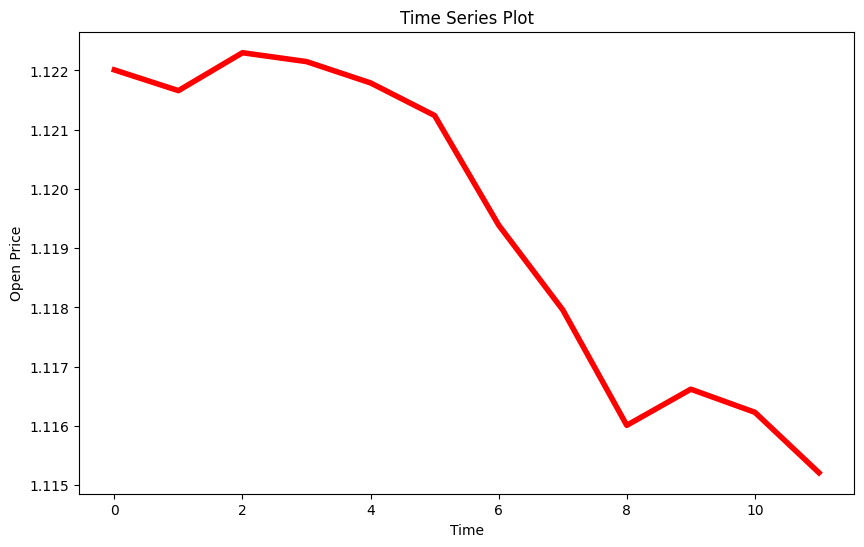

In [136]:
import matplotlib.pyplot as plt
import numpy as np


# Plot the time series
plt.figure(figsize=(10, 6))
# plt.plot(o, linestyle='-', color='b')
plt.plot(sequence_candle, c='red', linewidth=4)
# plt.plot(split_data[6], c='red', linewidth=4)
# Set labels and title
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Time Series Plot')

# Display the plot
plt.show()

In [92]:
datas = []
for data in split_data:
    

SyntaxError: incomplete input (173669507.py, line 2)

In [ ]:
split_data

# Test For Close Price

In [123]:
close = ohlcv[:,4]

In [124]:
close

array([1.33432, 1.33557, 1.33211, ..., 1.10869, 1.10848, 1.10779])

In [125]:
mp_close = stumpy.stump(close, m=12)

In [127]:
np.mean(mp_close[:,0])

0.906919372270842

In [129]:
close_motifs = stumpy.motifs(
    close,
    mp_close[:, 0],
    max_distance=0.44,max_motifs = 1)

In [130]:
close_motifs

(array([[0.        , 0.14607067, 0.34391582, 0.41792849, 0.43044155,
         0.43918563]]),
 array([[ 2596,  4851,  2539, 48146, 54303, 10923]]))

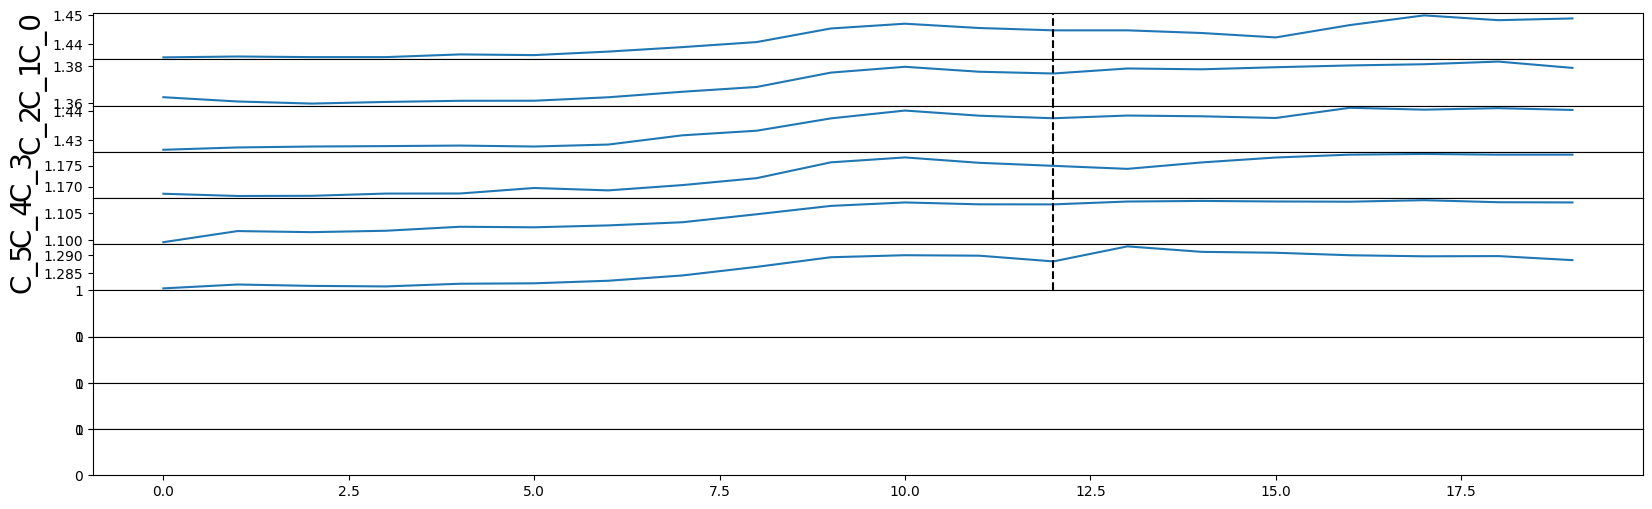

In [133]:
fig, axs = plt.subplots(10, sharex=True, gridspec_kw={'hspace': 0})

for i,idx in enumerate(close_motifs[1][0]) :
    axs[i].set_ylabel(f"C_{i}", fontsize='20')
    axs[i].plot(o[idx:idx+20])
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].axvline(x=12, linestyle="dashed", c='black')
plt.show()

# Test For Top K motips

In [56]:
list_motifs = stumpy.motifs(
    o,
    mp[3][:, 0],
    min_neighbors=10,
    max_distance=1e-4,max_motifs = 50)

/opt/conda/lib/python3.10/site-packages/stumpy/motifs.py:369: UserWarning: No motifs were found. You may consider increasing the `cutoff` (e.g., cutoff=0.0) and/or increasing the `max_distance `(e.g., max_distance=np.inf).
  warnings.warn(msg)


In [57]:
list_motifs

(array([], shape=(1, 0), dtype=float64),
 array([], shape=(1, 0), dtype=float64))

In [49]:
list_motifs[1][1]

array([    6, 42079,    -1,    -1,    -1,    -1,    -1,    -1,    -1,
          -1])

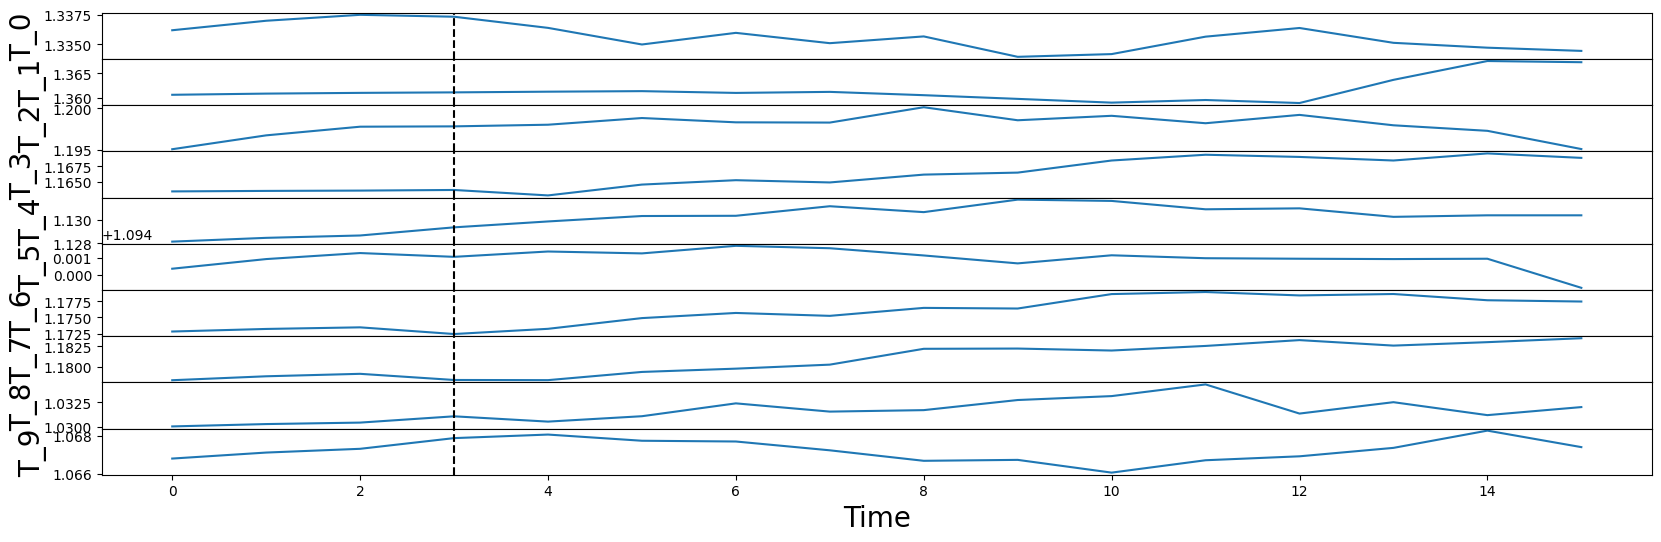

In [51]:
fig, axs = plt.subplots(10, sharex=True, gridspec_kw={'hspace': 0})

for i,idx in enumerate(list_motifs[1][2]) :
    axs[i].set_ylabel(f"T_{i}", fontsize='20')
    axs[i].plot(o[idx:idx+16])
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].axvline(x=3, linestyle="dashed", c='black')
plt.show()

# Test For Double - Series 

In [155]:
ov = ohlcv[:,[1,5]]

In [162]:
ov.shape

(78387, 2)

In [163]:
mps, indices = stumpy.mstump(ov.T,m=12)

In [164]:
indices

array([[38772, 44805, 22961, ..., 74534, 74535, 54332],
       [ 8040,  8041,   866, ..., 67574, 67575, 55772]])

In [165]:
mps

array([[0.69235372, 0.75050463, 0.76711618, ..., 0.43084682, 0.41733289,
        0.35533072],
       [1.23997909, 1.34709984, 1.52602156, ..., 1.33528404, 1.35396941,
        1.20684795]])

In [166]:
motif_double = stumpy.mmotifs(
    ov.T,
    mps,
    indices)

In [167]:
motif_double[]

(array([[0.        , 0.13976757, 0.332194  , 0.42413082, 0.44241695,
         0.44374007, 0.44445393, 0.48024635, 0.51147718, 0.51182919]]),
 array([[ 2597,  4852,  2540, 48147, 54304, 10924, 35387, 26249, 41534,
         74477]]),
 [array([0])],
 [array([377.68825906, 436.07820003])])